## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [2]:
!pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 770.1 kB/s eta 0:00:00


In [84]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [85]:
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [86]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


In [8]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [10]:
Xtrain.isnull().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

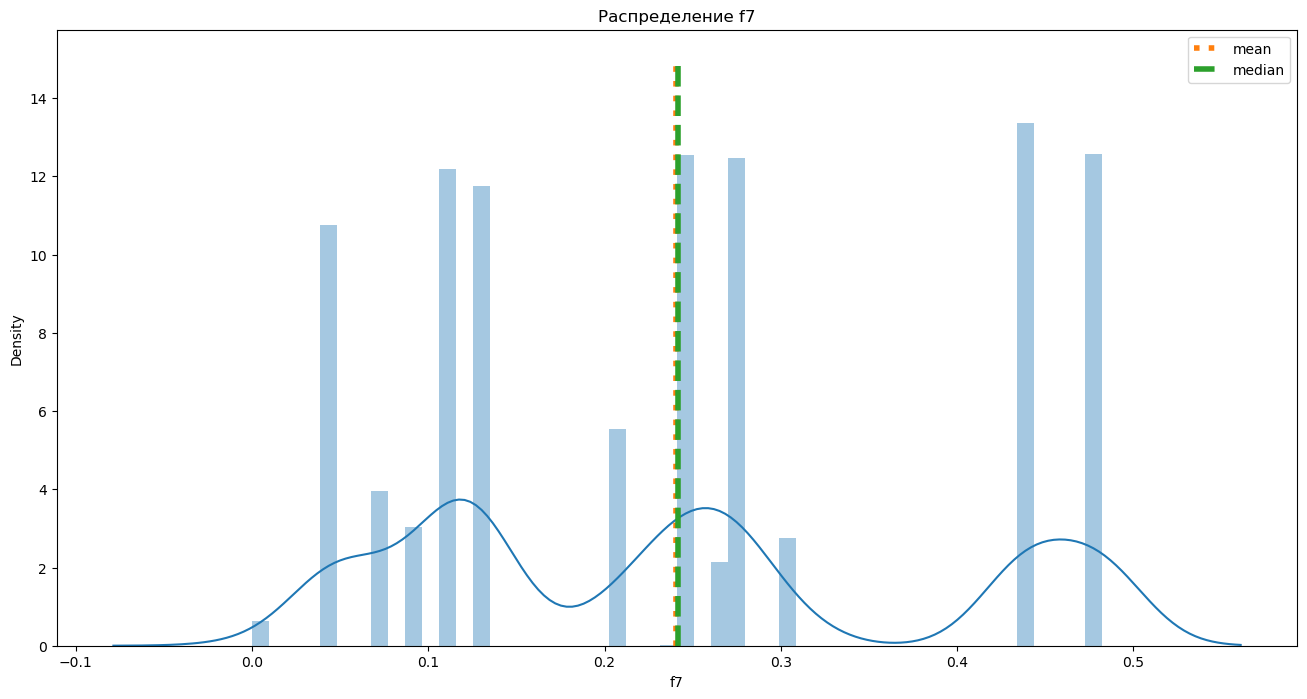

In [43]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

mean = Xtrain.f7.mean()
median = Xtrain.f7.median()

plt.figure(figsize = (16, 8))

sns.distplot(Xtrain['f7'], bins=50)

y = np.linspace(0, 15, 100)
plt.plot([mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([median] * 100, y, label='median',linestyle='--',  linewidth=4)


plt.title('Распределение f7')
plt.legend()
plt.show()

In [87]:
#В признаке f7 отсутствуем 1875 значений, в f2 75, в f11 10. Я проверила, медиана и среднее не сильно отличается друг от друга, 
#заполним пропуски в этим признаке средними значениями по столбцу
Xtrain.fillna(Xtrain.f7.mean().round(2), inplace=True)

In [78]:
Xtrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [49]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


Видим, что пустых значений в Xtest нет. 

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

[Text(0, 0, '5708'), Text(0, 0, '1792')]

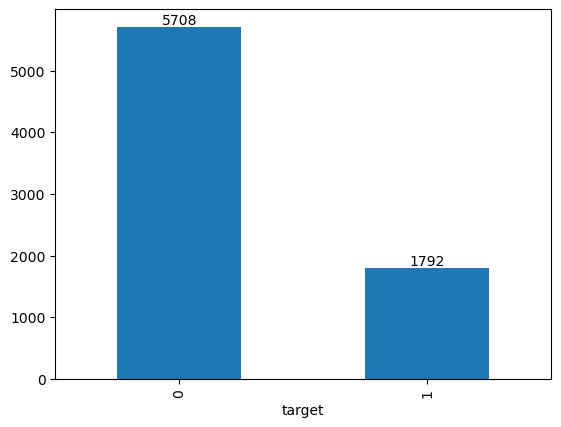

In [65]:
# Ваш код здесь
fig = Xtrain.target.value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0])

[Text(0, 0, '1913'), Text(0, 0, '587')]

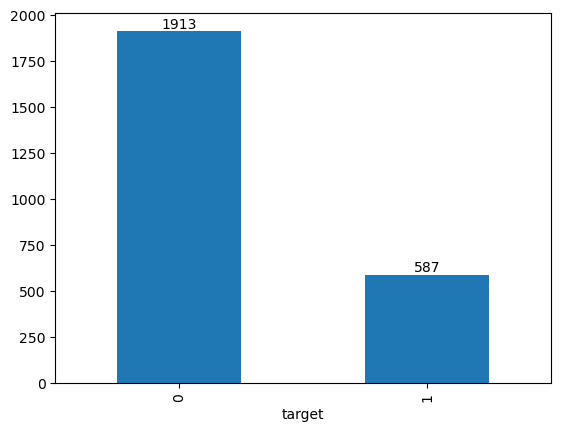

In [66]:

fig = Xtest.target.value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0])


В обих выборках классы несбалансированы (объектов одного класса сильно больше, чем объектов другого). Для задачи классификации в этом случае недостаточно использовать только метрику accuracy, которая равна доле правильных ответов классификатора к общему количеству объектов в выборке. Такая метрика очень плохо работает в случае несбалансированной выборки, так как она может предсказывать только объекты более распространенного метода и давать а нашем случае 76% точности просто потому что объектов 0 76% от всего количество объектов.

Для оценки моделей в случае несбалансированных классов лучше использовать F1-score: Гармоническое среднее между precision и recall. 
Precision: Доля верных предсказаний среди всех предсказанных объектов определенного класса
. Recall (Sensitivity): Доля верных предсказаний среди всех объектов этого класса в выборке
. AUC (Area Under the Curve): Площадь под кривой ROC (Receiver Operating Characteristic), которая показывает, насколько хорошо модель различает два класса.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [103]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, Logi

# Ваш код здесь

X = Xtrain.drop('target',axis=1)
y = Xtrain.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [104]:
lr = LogisticRegression()
svc = SVC()

lr.fit(X_train, y_train)
svc.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_svc = svc.predict(X_test)

print (f'F1 score для логистической регресси составляет {f1_score(y_test, y_pred_lr).round(2)}')
print (f'Accuracy для логистической регресси составляет {accuracy_score(y_test, y_pred_lr).round(2)}')
print (f'F1 score для метода опорных векторов составляет {f1_score(y_test, y_pred_svc).round(2)}')
print (f'Accuracy для метода опорных векторов составляет {accuracy_score(y_test, y_pred_svc).round(2)}')

F1 score для логистической регресси составляет 0.37
Accuracy для логистической регресси составляет 0.8
F1 score для метода опорных векторов составляет 0.08
Accuracy для метода опорных векторов составляет 0.77


Как видно из значений метрик, accuracy значительно выше f1 score, но это не говорит о том, что она корректна.

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

#### 1. Логистическая регрессия с L2 регуляризацией

In [152]:
from sklearn.linear_model import Ridge, Lasso

model_ridge = Ridge()
alpha = np.linspace(0.1, 10, 50)
# Подбор параметров модели с помощью GridSearchCV
param_grid = {"alpha": alpha}
grid_search = GridSearchCV(model_ridge, param_grid, scoring="f1", cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1       ,  0.30204082,  0.50408163,  0.70612245,  0.90816327,
        1.11020408,  1.3122449 ,  1.51428571,  1.71632653,  1.91836735,
        2.12040816,  2.32244898,  2.5244898 ,  2.72653061,  2.92857143,
        3.13061224,  3.33265306,  3.53469388,  3.73673469,  3.93877551,
        4.14081633,  4.34285714,  4.54489796,  4.74693878,  4.94897959,
        5.15102041,  5.35306122,  5.55510204,  5.75714286,  5.95918367,
        6.16122449,  6.36326531,  6.56530612,  6.76734694,  6.96938776,
        7.17142857,  7.37346939,  7.5755102 ,  7.77755102,  7.97959184,
        8.18163265,  8.38367347,  8.58571429,  8.7877551 ,  8.98979592,
        9.19183673,  9.39387755,  9.59591837,  9.79795918, 10.        ])},
             scoring='f1')

In [154]:
model_ridge_best = grid_search.best_estimator_
y_pred_ridge = model_ridge_best.predict(X_test)

Text(0.5, 0, 'Значения, предсказанные модели с L2 регуляризацией')

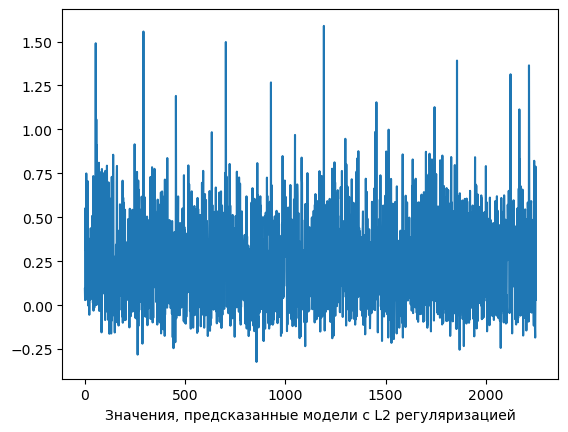

In [156]:
#Посмотрим на результаты предсказаний модели
plt.plot(y_pred_ridge)
plt.xlabel("Значения, предсказанные модели с L2 регуляризацией")

In [161]:
#Оценим, при какой границе между классами наша модель выдаст максимальную метрику f1.
thresholds = np.linspace(0, 0.5, 50)
recalls = {}
for threshold in thresholds:
    recalls[f1_score(y_test, (y_pred_ridge > threshold).astype(int))] = threshold
ridge_best_threshold = recalls[max(recalls.keys())].round(3)
print(f'Лучшая граница разделения классов для модели линейной регрессии {ridge_best_threshold}')

Лучшая граница разделения классов для модели линейной регрессии 0.357


In [172]:
print (f'F1 score для логистической регресси c L2 регуляризацией {f1_score(y_test, (y_pred_ridge > ridge_best_threshold).astype(int)).round(3)}')
print (f'Accuracy для логистической регресси с L2 регуляризацией {accuracy_score(y_test,  (y_pred_ridge > ridge_best_threshold).astype(int)).round(3)}')

F1 score для логистической регресси c L2 регуляризацией 0.671
Accuracy для логистической регресси с L2 регуляризацией 0.807


При условии L2 регуляризации мы улучшили f1 score до 0,671 при границе разделения классов 0.3571428571428571.

#### 2. Логистическая регрессия с L1 регуляризацией

In [216]:
#Оценим, при какой alfa и какой границе между классами наша модель c L1 регуляризацией выдаст максимальную метрику f1.
thresholds = np.linspace(0, 0.5, 50)
alfa = np.linspace(0, 0.03, 50)
df_l1 = pd.DataFrame(columns = ['alpha', 'threshold', 'f1_score'])
df_l1
for a in alfa:
    model_lasso= Lasso(alpha=a)
    model_lasso.fit(X_train, y_train)
    y_lasso_pred = model_lasso.predict(X_test)
    for threshold in thresholds:
        df_l1.loc[len(df_l1.index)]=[a, threshold, f1_score(y_test, (y_lasso_pred > threshold).astype(int))]

In [217]:
df_l1.iloc[df_l1[df_l1.f1_score== max(df_l1.f1_score)].index]

,alpha,threshold,f1_score
283,0.003061,0.336735,0.674927


In [218]:
print (f'F1 score для логистической регресси c L1 регуляризацией {f1_score(y_test, (y_pred_lasso > df_l1.iloc[283].threshold).astype(int)).round(3)}')
print (f'Accuracy для логистической регресси с L1 регуляризацией {accuracy_score(y_test,  (y_pred_lasso > df_l1.iloc[283].threshold).astype(int)).round(3)}')

F1 score для логистической регресси c L1 регуляризацией 0.675
Accuracy для логистической регресси с L1 регуляризацией 0.802


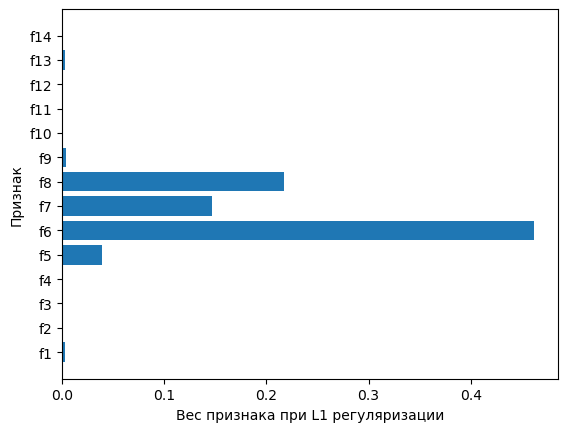

In [188]:
#Отобразим значимость признаков 
plt.barh(Xtrain.drop("target", axis=1).columns, model_lasso_best.coef_.flatten())

plt.xlabel("Вес признака при L1 регуляризации")
plt.ylabel("Признак")

plt.show()

При условии L1 регуляризации мы улучшили f1 score до 0,675 при границе разделения классов 0.336735.

#### 3. Метод опорных векторов со взвешенными классами

In [190]:
svc_balanced = SVC(class_weight='balanced')
svc_balanced.fit(X_train, y_train)
y_pred_svc_balanced = svc_balanced.predict(X_test)
print (f'F1 score для метода опорных векторов со взвешенными классами составляет {f1_score(y_test, y_pred_svc_balanced).round(2)}')
print (f'Accuracy для метода опорных векторов со взвешенными классами составляет {accuracy_score(y_test,y_pred_svc_balanced).round(2)}')

F1 score для метода опорных векторов со взвешенными классами составляет 0.22
Accuracy для метода опорных векторов со взвешенными классами составляет 0.79


Метод опорных векторов со взвешенными классами улучшил f1 score до 0,22 (было 0,08).

#### 4. Метод опорных векторов со взвешенными классами и полиномиальными признаками

In [193]:
from sklearn.preprocessing import PolynomialFeatures
# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

svc_balanced_poly = SVC(class_weight='balanced')
svc_balanced_poly.fit(X_train_poly, y_train)
y_pred_svc_balanced_poly = svc_balanced_poly.predict(X_test_poly)
print (f'F1 score для метода опорных векторов со взвешенными классами и полиномиальными признаками составляет {f1_score(y_test, y_pred_svc_balanced_poly).round(2)}')
print (f'Accuracy для метода опорных векторов со взвешенными классами и полиномиальными признаками составляет {accuracy_score(y_test,y_pred_svc_balanced_poly).round(2)}')

F1 score для метода опорных векторов со взвешенными классами и полиномиальными признаками составляет 0.37
Accuracy для метода опорных векторов со взвешенными классами и полиномиальными признаками составляет 0.49


Метод опорных векторов со взвешенными классами и полиномиальными признаками улучшил f1 score до 0,37.

#### 5.  Логистическая регрессия с L1 регуляризацией и полиномиальными признаками

In [226]:
#Оценим, при какой alfa и какой границе между классами наша модель c L1 регуляризацией выдаст максимальную метрику f1.
thresholds = np.linspace(0, 0.5, 50)
alfa = np.linspace(0, 0.03, 50)
df_l1_poly = pd.DataFrame(columns = ['alpha', 'threshold', 'f1_score'])
for a in alfa:
    model_lasso= Lasso(alpha=a)
    model_lasso.fit(X_train_poly, y_train)
    y_lasso_pred_poly = model_lasso.predict(X_test_poly)
    for threshold in thresholds:
        df_l1_poly.loc[len(df_l1_poly.index)]=[a, threshold, f1_score(y_test, (y_lasso_pred_poly > threshold).astype(int))]

In [229]:
df_l1_poly.iloc[df_l1_poly[df_l1_poly.f1_score== max(df_l1_poly.f1_score)].index]

,alpha,threshold,f1_score
83,0.000612,0.336735,0.690402


In [230]:
print (f'F1 score для логистической регресси c L1 регуляризацией и полиномиальными признаками {df_l1_poly.iloc[83].f1_score.round(3)}')


F1 score для логистической регресси c L1 регуляризацией и полиномиальными признаками 0.69


Метод логистической регресси c L1 регуляризацией и полиномиальными признаками дал f1 score 0.69

#### 6.  Логистическая регрессия с L2 регуляризацией и полиномиальными признаками

In [208]:
alpha = np.linspace(0.1, 10, 50)
# Подбор параметров модели с помощью GridSearchCV
param_grid = {"alpha": alpha}
grid_search = GridSearchCV(model_ridge, param_grid, scoring="f1", cv=5)
grid_search.fit(X_train_poly, y_train)
model_ridge_best_poly = grid_search.best_estimator_
y_pred_ridge_poly = model_ridge_best_poly.predict(X_test_poly)

In [211]:
#Оценим, при какой границе между классами наша модель выдаст максимальную метрику f1.
thresholds = np.linspace(0, 0.5, 50)
recalls = {}
for threshold in thresholds:
    recalls[f1_score(y_test, (y_pred_ridge_poly > threshold).astype(int))] = threshold
ridge_best_threshold_poly = recalls[max(recalls.keys())].round(3)
print(f'Лучшая граница разделения классов для модели линейной регрессии {ridge_best_threshold_poly}')

Лучшая граница разделения классов для модели линейной регрессии 0.357


In [212]:
print (f'F1 score для логистической регресси c L2 регуляризацией {f1_score(y_test, (y_pred_ridge_poly > ridge_best_threshold_poly).astype(int)).round(3)}')
print (f'Accuracy для логистической регресси с L2 регуляризацией {accuracy_score(y_test,  (y_pred_ridge_poly > ridge_best_threshold_poly).astype(int)).round(3)}')

F1 score для логистической регресси c L2 регуляризацией 0.683
Accuracy для логистической регресси с L2 регуляризацией 0.827


Метод логистической регресси c L2 регуляризацией и полиномиальными признаками дал f1 score 0.683

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [ ]:
# Ваш код здесь
#Лучшее значение f1 score нам дала модель логистическая регрессия с L1 регуляризацией и полиномиальными признаками

In [239]:
Xtest_poly = poly.fit_transform(Xtest.drop('target', axis=1))

In [247]:
y_pred_best_model = best_model_lasso.predict(Xtest_poly)
print (f'F1 score для лучшей модели {f1_score(Xtest.target, (y_pred_best_model > df_l1_poly.iloc[83].threshold.round(3)).astype(int)).round(3)}')
print (f'Accuracy для лучшей модели {accuracy_score(Xtest.target,  (y_pred_best_model > df_l1_poly.iloc[83].threshold.round(3)).astype(int)).round(3)}')

F1 score для лучшей модели 0.475
Accuracy для лучшей модели 0.821


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [253]:
# Ваш код здесь
alpha = np.linspace(0, 0.5, 50)
df_final = pd.DataFrame(columns = ['alpha', 'threshold', 'f1_score'])
for a in alpha:
    y_pred = a * y_pred_best_model + (1-a)* model_ridge_best_poly.predict(Xtest_poly)
    for threshold in thresholds:
        df_final.loc[len(df_final.index)]=[a, threshold, f1_score(Xtest.target, (y_pred > threshold).astype(int))]

In [257]:
df_final[df_final.f1_score==max(df_final.f1_score)]

,alpha,threshold,f1_score
1422,0.285714,0.22449,0.613782


При альфа = 0.285714 и границе разделения классов 0.22449 смесь моделей достигает метрики f1 score 0,614 на отложенной тестовой выборке.

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

Для улучшения базовых моделей логистической регрессии я использовала L1 и L2 регуляризацию, метода опорных векторов - взвешивание классов, так же для обоих моделей использовала ввод полиномиальных признаков. Лучших результатов я добилась у модели логистической регрессии с L1 регуляризацией и полиномиальными признаками, f1 = 0.69 на тестовой выборке и 0,475 на отложенной тестовой выборке. На втором месте была модель логистической регрессии с L2 регуляризацией и полиномиальными признаками, f1 = 0.683 на тестовой выборке. При комбинации этих двух моделей со значением альфа  = 0.285714 и границе разделения классов 0.22449 смесь моделей достигает метрики f1 score 0,614 на отложенной тестовой выборке.


Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.